In [1]:
import numpy as np
import matplotlib.pyplot as plt

#get the paths to be able to import functions and csv files
%cd /Users/ronja/Documents/GitHub/neural-fields

import sys
sys.path.append('/Users/ronja/Documents/GitHub/neural-fields/py')
csv_path = '/Users/ronja/Documents/GitHub/neural-fields/csv'
sys.path.append(csv_path)

from params import setParams
from runFuncs import run_activity, run_fixedpoints, run_violation

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2 


/Users/ronja/Documents/GitHub/neural-fields
1d Model initialised.


In [54]:
ee = 0.47
ii = 0.01

params={'I_e': ee, 'I_i': ii, 'b': 0.25, 'end_t': 10*1000, 'mu_a': 0.4, 'beta_a': 10, 'lengt': 50, 'n': 128,
        'seed': True, 'seed_amp': 0.1, 'delayed': False}#, 'length': 10, 'n': 14}

params = setParams(params)
fps, stab = run_fixedpoints(params)
vio = run_violation(params, fps[0])

print('with adaptation: fixed points %s ' %str(fps))
print('with (mass) stability %s'  %str(stab))
print('and continuum-stability for down state %s' %str(vio))

#short delay means fast velocity of activity -> higher c for shorter delay
params_short_delay = {'I_e': ee, 'I_i': ii, 'b': 0.25, 'end_t': 10*1000, 'mu_a': 0.4, 'beta_a': 10, 'lengt': 50, 'n': 128,
                        'seed': True, 'seed_amp': 0.1, 'delayed': True, 'c': 5}
params_short_delay = setParams(params_short_delay)
fps1, stab1 = run_fixedpoints(params_short_delay)
vio1 = run_violation(params_short_delay, fps1[0])

print('with adaptation: fixed points %s ' %str(fps1))
print('with (mass) stability %s'  %str(stab1))
print('and continuum-stability for down state %s' %str(vio1))

params_long_delay = {'I_e': ee, 'I_i': ii, 'b': 0.25, 'end_t': 10*1000, 'mu_a': 0.4, 'beta_a': 10, 'lengt': 50, 'n': 128,
                        'seed': True, 'seed_amp': 0.1, 'delayed': True, 'c': 1}
params_long_delay = setParams(params_long_delay)
fps2, stab2 = run_fixedpoints(params_long_delay)
vio2 = run_violation(params_long_delay, fps2[0])

print('without adaptation: fixed points %s w/o adaps' %str(fps2))
print('with (mass) stability %s w/o adaps'  %str(stab2))
print('and continuum-stability for down state %s' %str(vio2))


with adaptation: fixed points [[0.12140373 0.47685033]
 [0.85251023 0.9999334 ]
 [0.97653778 0.99999139]] 
with (mass) stability [1, 0, 1]
and continuum-stability for down state (1, 1, 0)
with adaptation: fixed points [[0.12140373 0.47685033]
 [0.85251023 0.9999334 ]
 [0.97653778 0.99999139]] 
with (mass) stability [1, 0, 1]
and continuum-stability for down state (1, 1, 0)
without adaptation: fixed points [[0.12140373 0.47685033]
 [0.85251023 0.9999334 ]
 [0.97653778 0.99999139]] w/o adaps
with (mass) stability [1, 0, 1] w/o adaps
and continuum-stability for down state (1, 1, 0)


In [55]:
params_short_delay.delay, params_long_delay.delay

(array([ 1,  1,  2,  3,  4,  4,  5,  6,  7,  8,  8,  9, 10, 11, 11, 12, 13,
        14, 15, 15, 16, 17, 18, 18, 19, 20, 21, 22, 22, 23, 24, 25, 26, 26,
        27, 28, 29, 29, 30, 31, 32, 33, 33, 34, 35, 36, 36, 37, 38, 39, 40,
        40, 41, 42, 43, 43, 44, 45, 46, 47, 47, 48, 49, 50, 51, 50, 49, 48,
        47, 47, 46, 45, 44, 43, 43, 42, 41, 40, 40, 39, 38, 37, 36, 36, 35,
        34, 33, 33, 32, 31, 30, 29, 29, 28, 27, 26, 26, 25, 24, 23, 22, 22,
        21, 20, 19, 18, 18, 17, 16, 15, 15, 14, 13, 12, 11, 11, 10,  9,  8,
         8,  7,  6,  5,  4,  4,  3,  2,  1]),
 array([  1,   4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  43,  47,
         51,  55,  59,  63,  67,  71,  75,  79,  83,  86,  90,  94,  98,
        102, 106, 110, 114, 118, 122, 126, 129, 133, 137, 141, 145, 149,
        153, 157, 161, 165, 168, 172, 176, 180, 184, 188, 192, 196, 200,
        204, 208, 211, 215, 219, 223, 227, 231, 235, 239, 243, 247, 251,
        247, 243, 239, 235, 231, 227, 223, 219, 215, 211,

In [56]:
ue, ui = run_activity(params, fp=fps[0])
params.delayed, params.c

(False, 10)

In [57]:
ue_short_delay, ui_short_delay = run_activity(params_short_delay, fp=fps1[0])
params_short_delay.c

5

In [58]:
ue_long_delay, ui_long_delay = run_activity(params_long_delay, fp=fps2[0])
params_long_delay.c

1

Text(0, 0.5, 'space')

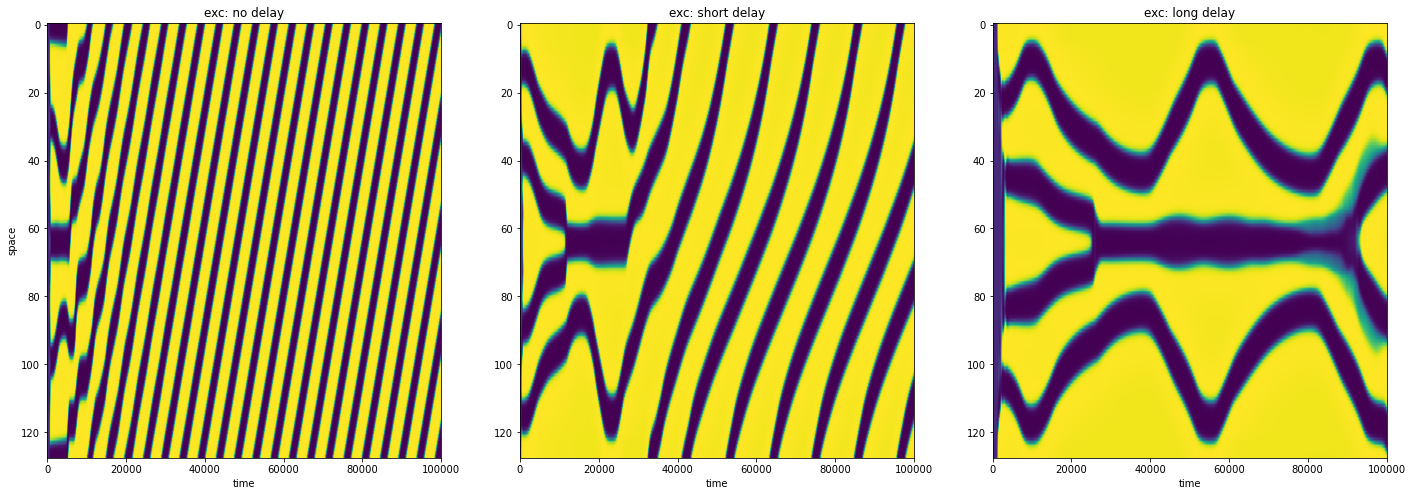

In [59]:
fix, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(24,8))

ax0.imshow(ue.T, vmin=0, vmax=1, aspect='auto')
ax1.imshow(ue_short_delay.T, vmin=0, vmax=1, aspect='auto')
ax2.imshow(ue_long_delay.T, vmin=0, vmax=1, aspect='auto')

ax0.set_title(label='exc: no delay')
ax1.set_title(label='exc: short delay')
ax2.set_title(label='exc: long delay')

for ax in [ax0, ax1, ax2]:
    ax.set_xlabel('time')

ax0.set_ylabel('space')

Text(0, 0.5, 'space')

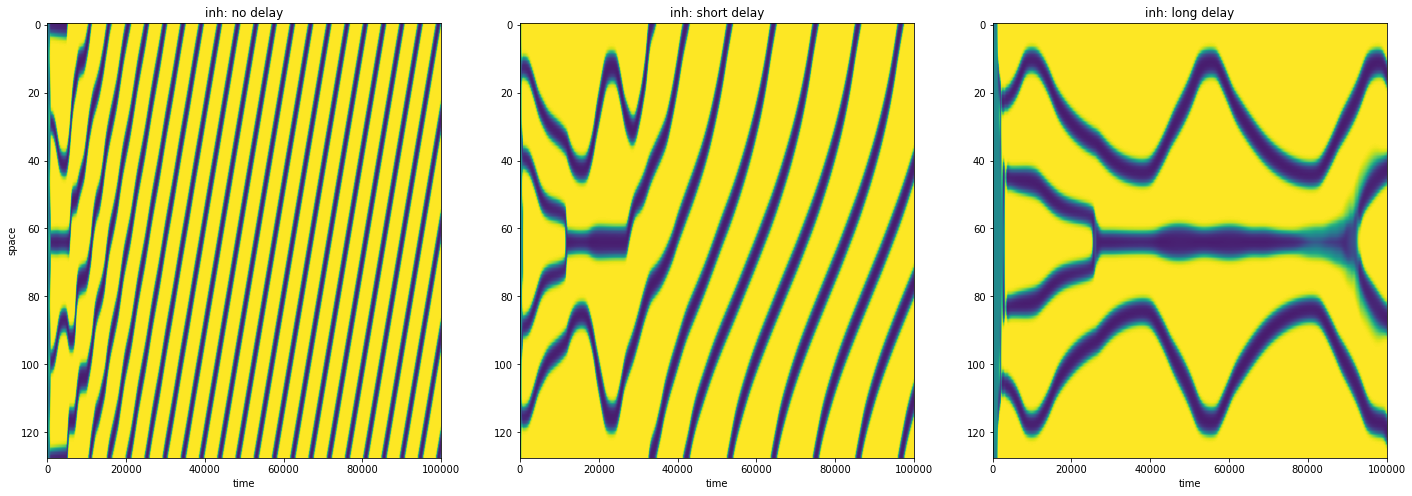

In [60]:
fix, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(24,8))

ax0.imshow(ui.T, vmin=0, vmax=1, aspect='auto')
ax1.imshow(ui_short_delay.T, vmin=0, vmax=1, aspect='auto')
ax2.imshow(ui_long_delay.T, vmin=0, vmax=1, aspect='auto')

ax0.set_title(label='inh: no delay')
ax1.set_title(label='inh: short delay')
ax2.set_title(label='inh: long delay')

for ax in [ax0, ax1, ax2]:
    ax.set_xlabel('time')

ax0.set_ylabel('space')

In [9]:
# Define the distance-dependent delays
max_delay = 5  # Adjust this value as needed
delay_matrix = np.zeros_like(ue)  # Initialize delay matrix

# Compute delays based on distance
for distance in range(1, max_delay + 1):
    delay_matrix[:, distance:] += ue[:, :-distance]

# Compute the delayed activity
delayed_ue = ue - delay_matrix

# Compute the Fourier transform of the delayed activity
ve = np.fft.fft(delayed_ue)

# Compute the delayed convolution
Le = params.ke_fft * ve

# Compute the delayed convolutions
conv_e = np.fft.ifft(Le).real


In [49]:
# Define the distance-dependent delays
max_delay = 5  # Adjust this value as needed
delay_matrix = np.zeros_like(ue[-1])  # Initialize delay matrix
print(delay_matrix)


# Compute delays based on distance
#for distance in range(1, max_delay + 1):
#    delay_matrix[:, distance:] += ue[:, :-distance]

# Compute the delayed activity
delayed_ue = ue[-1] - delay_matrix

# Compute the Fourier transform of the delayed activity
ve = np.fft.fft(delayed_ue)

# Compute the delayed convolution
Le = params.ke_fft * ve

# Compute the delayed convolutions
conv_e = np.fft.ifft(Le).real


[0. 0. 0. 0. 0. 0. 0. 0.]


In [53]:
params.x

array([ -0.  ,  -6.25, -12.5 , -18.75, -25.  ,  18.75,  12.5 ,   6.25])

In [78]:
ue

array([[0.37467505, 0.12533612, 0.12533612, 0.12533612, 0.12533612,
        0.12533612, 0.12533612, 0.12533612],
       [0.43720274, 0.17992015, 0.18403235, 0.18427711, 0.18427782,
        0.18427711, 0.18403235, 0.17992015],
       [0.49348188, 0.25427027, 0.26008791, 0.26041476, 0.26041563,
        0.26041476, 0.26008791, 0.25427027],
       [0.54413361, 0.32820339, 0.33365001, 0.33395386, 0.33395466,
        0.33395386, 0.33365001, 0.32820339],
       [0.58972023, 0.39533336, 0.40025086, 0.40052506, 0.40052577,
        0.40052506, 0.40025086, 0.39533336],
       [0.6307482 , 0.45579512, 0.4602223 , 0.46046914, 0.46046979,
        0.46046914, 0.4602223 , 0.45579512],
       [0.66767338, 0.51021499, 0.51419962, 0.51442178, 0.51442236,
        0.51442178, 0.51419962, 0.51021499],
       [0.70090604, 0.55919339, 0.56277958, 0.56297953, 0.56298006,
        0.56297953, 0.56277958, 0.55919339],
       [0.73081544, 0.60327403, 0.60650161, 0.60668157, 0.60668204,
        0.60668157, 0.606501

In [88]:
delay = np.linspace(1,params.n,params.n).astype(int)
#indeces for delays - makes the delayed time steps easier to call
indeces = np.array([len(ue)*np.ones(params.n)-delay]).astype(int)
temp_e = ue[indeces,delay-1]
temp_e

array([[0.78196051, 0.64294663, 0.60650161, 0.56297953, 0.51442236,
        0.46046914, 0.40025086, 0.32820339]])

In [89]:
delay-1

array([0, 1, 2, 3, 4, 5, 6, 7])

In [90]:
ve = np.fft.fft(temp_e)

In [91]:
ve

array([[4.29773403+0.j        , 0.23055741-0.50129362j,
        0.28963039-0.21223284j, 0.30451887-0.08879213j,
        0.30853666+0.j        , 0.30451887+0.08879213j,
        0.28963039+0.21223284j, 0.23055741+0.50129362j]])

In [30]:
delayed_ue

array([[ 0.32480726, -0.1994704 , -0.324808  , -0.45014413, -0.57548025,
        -0.70081637, -0.50134523, -0.50134448, -0.50134448, -0.50134374],
       [ 0.39201292, -0.23533009, -0.38585694, -0.54771922, -0.71150701,
        -0.87534968, -0.64718015, -0.65436777, -0.65632084, -0.66150029],
       [ 0.45275854, -0.25140486, -0.43729219, -0.65187857, -0.87087376,
        -1.08998556, -0.85633994, -0.87415692, -0.87862422, -0.89185692],
       [ 0.50747169, -0.24481818, -0.48496472, -0.76724631, -1.0552142 ,
        -1.34332473, -1.12396459, -1.14949344, -1.15525123, -1.1748793 ],
       [ 0.5567218 , -0.2247969 , -0.53381417, -0.88585732, -1.24341083,
        -1.6011008 , -1.40206988, -1.42790364, -1.43348239, -1.45360064],
       [ 0.60104883, -0.20304164, -0.57999496, -0.99651484, -1.41805493,
        -1.83971906, -1.66033518, -1.68405455, -1.68913692, -1.7076496 ],
       [ 0.64094369, -0.18286073, -0.62192426, -1.0967344 , -1.57607298,
        -2.0555234 , -1.89403086, -1.91545462